In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

## AlexNet Architecture
<img src=https://neurohive.io/wp-content/uploads/2018/10/AlexNet-1.png>

<img src=https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-19-16-01-03.png>

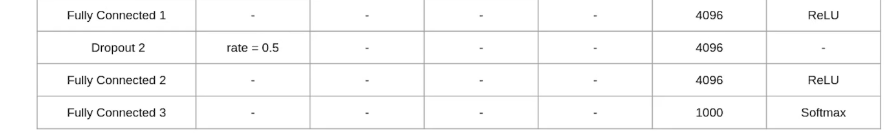

In [31]:
def alex_net(input_shape,n_class):
    model = keras.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(96,kernel_size=(3,3),strides=(4,4),activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2,2)))

    model.add(layers.Conv2D(256,kernel_size=(5,5),padding='same',activation = 'relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2,2)))

    model.add(layers.Conv2D(384,kernel_size=(3,3),padding='same',activation = 'relu'))
    model.add(layers.Conv2D(384,kernel_size=(3,3),padding='same',activation = 'relu'))
    model.add(layers.Conv2D(256,kernel_size=(3,3),padding='same',activation = 'relu'))

    model.add(layers.MaxPool2D(pool_size=(2, 2),strides=(2,2)))
    model.add(layers.Dropout(0.5))    

    model.add(layers.Flatten())
    model.add(layers.Dense(4096,activation='relu'))
    model.add(layers.Dropout(0.5))    
    model.add(layers.Dense(4096,activation='relu'))
    model.add(layers.Dense(n_class,activation='softmax'))
    
    return model

In [32]:
input_shape=(32,32,3)
n_class = 10
model = alex_net(input_shape,n_class)

In [37]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [38]:
model.fit(x_train,y_train,batch_size=256,epochs=1,verbose=1)

 13/196 [>.............................] - ETA: 5:17 - loss: 2.3288 - accuracy: 0.1187

KeyboardInterrupt: 

In [35]:
model.fit?